In [36]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [121]:
def get_data(path):
    df = pd.read_csv(path)
    cols = list(df.columns)
    X,Y = df[cols[:-1]].values,df[cols[-1]]
    print(Y[0])
    names = list(set(Y))
    K = len(names)
    N = len(Y)
    namestoint = dict({name:i for i,name in enumerate(names)})
    print(namestoint)
#     Y = [namestoint[Y[i]] for i in range(N)]
    T = np.zeros((N, K))
    for i in range(N):
        T[i, namestoint[Y[i]]] = 1
    return X,T

In [122]:
path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\archive\IRIS.csv"
X,Y = get_data(path)

Iris-setosa
{'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2}


In [123]:
Y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [128]:


X,Y = shuffle(X,Y)
train_split = 0.7
split_idx = int(train_split*len(X))
X_train = X[:split_idx]
Y_train = Y[:split_idx]
X_test = X[split_idx:]
Y_test = Y[split_idx:]

In [206]:
def forward(X,W1,b1,W2,b2,W3,b3,k0,k1,k2):
#     Z = X.dot(W1)+b1
#     Z = Z*(Z>0)
#     Z = 1/(1+np.exp(-(X.dot(W1)+b1)))
#     activation = Z.dot(W2)+b2
#     Y = 1/(1+np.exp(-activation))
#     print(W1.shape)
#     print(b1.shape)
    Z1 = X.dot(W1)+b1
#     print(f"Z1.shape={Z1.shape}")
    A1 = sigmoid(Z1,k0,k1,k2)
#     print(A1.shape)
#     print(W1.shape)
#     print(b2.shape)
    Z2 = A1.dot(W2)+b2
    
#     print(Z2.shape)
    A2 = sigmoid(Z2,k0,k1,k2)
    Z3 = A2.dot(W3)+b3
    A3 = softmax(Z3)
#     print(A3.shape)
    return Z1,A1,Z2,A2,Z3,A3

def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def sigmoid(Z,k0,k1,k2):
    return g(Z,k0,k1,k2)
#     return 1/(1+np.exp(-Z))

def derivative_sigmoid(Z,k0,k1,k2):
    return k1
#     return k1+2*k2*Z

def predict(X,W1,b1,W2,b2,W3,b3,k0,k1,k2):
    Z1,A1,Z2,A2,Z3,A3 = forward(X,W1,b1,W2,b2,W3,b3,k0,k1,k2)
    return np.round(A3)


def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()

def get_log_likelihood(T,Y):
#     ll = np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    ll = cost(Y,T)
    if ll!=ll:ll=0
    return ll

def g(x,k0,k1,k2):
#     return k0+k1*x+k2*x*x
    return k0+k1*x

def derivative_Z3(A3,Y):
    return A3-Y

def derivative_W3(A2,gZ3,N):
    ans =  A2.T.dot(gZ3)/N
    return ans

def derivative_b3(gZ3):
    return gZ3.mean(axis=0)

def derivative_A2(gZ3,W3):
    return gZ3.dot(W3.T)

def derivative_Z2(Z2,gA2,k0,k1,k2):
    return derivative_sigmoid(Z2,k0,k1,k2)*gA2

#     return sigmoid(Z2)*(1-sigmoid(Z2))*gA2

def derivative_W2(A1,gZ2,N):
    ans = A1.T.dot(gZ2)/N
    return ans

def derivative_b2(gZ2):
    return gZ2.mean(axis=0)

def derivative_A1(gZ2,W2):
    return gZ2.dot(W2.T)

def derivative_Z1(Z1,gA1,k0,k1,k2):
    return derivative_sigmoid(Z1,k0,k1,k2)*gA1
#     return sigmoid(Z1)*(1-sigmoid(Z1))*gA1

def derivative_W1(X,dZ1,N):
    ans =  X.T.dot(dZ1)/N
    return ans

def derivative_b1(dZ1):
    return dZ1.mean(axis=0)

def run_multilayer_perceptron(X,Y,n_hidden_1=10,n_hidden_2=20,learning_rate=1e-2,iterations=3000,regularization=0.,verbose=True):
    N,D = X.shape
    k0 = np.random.randn()
    k1 = np.random.randn()
    k2 = np.random.randn()
#     print(f"Y.shape={Y.shape}")
    K = len(np.unique(Y,axis=0))
    W1 = np.random.randn(D,n_hidden_1)
    b1 = np.random.randn(n_hidden_1)
    W2 = np.random.randn(n_hidden_1,n_hidden_2)
    b2 = np.random.randn(n_hidden_2)
    W3 = np.random.randn(n_hidden_2,K)
    b3 = np.random.randn(K)
#     print(f"X.shape={X.shape}")
    LL = []
    er = 0
    last_error_rate = None
    for i in range(iterations):
        Z1,A1,Z2,A2,Z3,A3 = forward(X,W1,b1,W2,b2,W3,b3,k0,k1,k2)
        K = np.array([k0,k1,k2])
        ll = get_log_likelihood(Y,A3)
#         print(f"ll={ll}")
        prediction = predict(X,W1,b1,W2,b2,W3,b3,k0,k1,k2)
#         print(f"prediction = {prediction}")
        er = np.abs(prediction-Y).mean()
#         print(f"er={er}")
        LL.append(ll)
        
        gZ3 = derivative_Z3(A3,Y)
        gW3 = derivative_W3(A2,gZ3,N)
#         print(W3.shape)
#         print(gW3.shape)
        
        gb3 = derivative_b3(gZ3)
#         print(gb3.shape)
#         print(b3.shape)
        gA2 = derivative_A2(gZ3,W3)
#         print(gA2.shape)
#         print(A2.shape)
        gZ2 = derivative_Z2(Z2,gA2,k0,k1,k2)
#         print(gZ2.shape)
#         print(Z2.shape)
        gW2 = derivative_W2(A1,gZ2,N)
        gb2 = derivative_b2(gZ2)
        gK2 = np.array([np.mean(gA2),np.mean(gA2*Z2),np.mean(gA2*Z2*Z2)])
#         print(np.mean(gA2))
#         print(gK2)
#         break
        gA1 = derivative_A1(gZ2,W2)
        gZ1 = derivative_Z1(Z1,A1,k0,k1,k2)
        gW1 = derivative_W1(X,gZ1,N)
        gb1 = derivative_b1(gZ1)
        
        gK1 = np.array([np.mean(gA1),np.mean(gA1*Z1),np.mean(gA1*Z1*Z1)])
        
        
        gK = gK2+gK1
        
        W1 -= learning_rate*(gW1)
        b1 -= learning_rate*(gb1)
        W2 -= learning_rate*(gW2)
        b2 -= learning_rate*(gb2)
        W3 -= learning_rate*(gW3)
        b3 -= learning_rate*(gb3)
        K -= learning_rate*(gK)
#         break
        if i%100==0 and verbose==True:
            print(f"i:{i}, ll:{ll}, train_classification_rate:{1-er}")
    if verbose==True:
        plt.plot(LL)
        plt.show()
    accuracy = 1-er
    
    return (LL,W1,b1,W2,b2,W3,b3,accuracy,K[0],K[1],K[2])
    
    

i:0, ll:3252.7041416694196, train_classification_rate:0.6190476190476191
i:100, ll:2867.7324892644947, train_classification_rate:0.6761904761904762
i:200, ll:2577.7575354954033, train_classification_rate:0.7015873015873015
i:300, ll:2332.7309803966073, train_classification_rate:0.7269841269841271
i:400, ll:2125.168378185768, train_classification_rate:0.7396825396825397
i:500, ll:1940.0741306347256, train_classification_rate:0.746031746031746
i:600, ll:1770.1508269774238, train_classification_rate:0.7523809523809524
i:700, ll:1614.9806458361345, train_classification_rate:0.7587301587301587
i:800, ll:1473.59351337067, train_classification_rate:0.7587301587301587
i:900, ll:1343.3495440215247, train_classification_rate:0.7587301587301587
i:1000, ll:1222.880040921173, train_classification_rate:0.7587301587301587
i:1100, ll:1111.1073377532084, train_classification_rate:0.7587301587301587
i:1200, ll:1006.935551951749, train_classification_rate:0.7587301587301587
i:1300, ll:909.6354592953392, 

i:11200, ll:29.714408045657635, train_classification_rate:0.9682539682539683
i:11300, ll:29.393705392934244, train_classification_rate:0.9682539682539683
i:11400, ll:29.07820254233834, train_classification_rate:0.9682539682539683
i:11500, ll:28.767771373909056, train_classification_rate:0.9682539682539683
i:11600, ll:28.46228836632352, train_classification_rate:0.9682539682539683
i:11700, ll:28.161634412634875, train_classification_rate:0.9682539682539683
i:11800, ll:27.865694644738625, train_classification_rate:0.9682539682539683
i:11900, ll:27.574358265927884, train_classification_rate:0.9682539682539683
i:12000, ll:27.287518390961363, train_classification_rate:0.9682539682539683
i:12100, ll:27.005071893129738, train_classification_rate:0.9682539682539683
i:12200, ll:26.726919257854405, train_classification_rate:0.9682539682539683
i:12300, ll:26.452964442395388, train_classification_rate:0.9682539682539683
i:12400, ll:26.183114741287838, train_classification_rate:0.9682539682539683
i

i:22000, ll:11.8667878871433, train_classification_rate:0.9809523809523809
i:22100, ll:11.793582132352277, train_classification_rate:0.9809523809523809
i:22200, ll:11.721352144351425, train_classification_rate:0.9809523809523809
i:22300, ll:11.65008542291463, train_classification_rate:0.9809523809523809
i:22400, ll:11.579769624226707, train_classification_rate:0.9809523809523809
i:22500, ll:11.51039256024841, train_classification_rate:0.9809523809523809
i:22600, ll:11.441942198175958, train_classification_rate:0.9809523809523809
i:22700, ll:11.37440665999048, train_classification_rate:0.9809523809523809
i:22800, ll:11.307774222093254, train_classification_rate:0.9809523809523809
i:22900, ll:11.24203331502095, train_classification_rate:0.9809523809523809
i:23000, ll:11.177172523236745, train_classification_rate:0.9809523809523809
i:23100, ll:11.11318058499006, train_classification_rate:0.9746031746031746
i:23200, ll:11.050046392240835, train_classification_rate:0.9746031746031746
i:2330

i:32800, ll:7.862167444080031, train_classification_rate:0.9809523809523809
i:32900, ll:7.852550237523431, train_classification_rate:0.9809523809523809
i:33000, ll:7.8433752485964, train_classification_rate:0.9809523809523809
i:33100, ll:7.834642794602145, train_classification_rate:0.9809523809523809
i:33200, ll:7.826353215584406, train_classification_rate:0.9809523809523809
i:33300, ll:7.8185068720749324, train_classification_rate:0.9809523809523809
i:33400, ll:7.8111041428532575, train_classification_rate:0.9809523809523809
i:33500, ll:7.804145422717724, train_classification_rate:0.9809523809523809
i:33600, ll:7.797631120270483, train_classification_rate:0.9809523809523809
i:33700, ll:7.791561655716124, train_classification_rate:0.9809523809523809
i:33800, ll:7.785937458674815, train_classification_rate:0.9809523809523809
i:33900, ll:7.78075896601153, train_classification_rate:0.9809523809523809
i:34000, ll:7.7760266196811525, train_classification_rate:0.9809523809523809
i:34100, ll:

i:43600, ll:9.358176482017873, train_classification_rate:0.9873015873015873
i:43700, ll:9.393482402075419, train_classification_rate:0.9873015873015873
i:43800, ll:9.429081583478439, train_classification_rate:0.9873015873015873
i:43900, ll:9.46496997583299, train_classification_rate:0.9873015873015873
i:44000, ll:9.501143508702567, train_classification_rate:0.9873015873015873
i:44100, ll:9.5375980934977, train_classification_rate:0.9873015873015873
i:44200, ll:9.574329625368446, train_classification_rate:0.9873015873015873
i:44300, ll:9.611333985101016, train_classification_rate:0.9873015873015873
i:44400, ll:9.648607041012891, train_classification_rate:0.9873015873015873
i:44500, ll:9.686144650844835, train_classification_rate:0.9873015873015873
i:44600, ll:9.723942663646465, train_classification_rate:0.9873015873015873
i:44700, ll:9.761996921653541, train_classification_rate:0.9873015873015873
i:44800, ll:9.800303262152978, train_classification_rate:0.9873015873015873
i:44900, ll:9.8

i:54600, ll:14.190904792144957, train_classification_rate:0.9682539682539683
i:54700, ll:14.237633999622009, train_classification_rate:0.9682539682539683
i:54800, ll:14.284339684904564, train_classification_rate:0.9682539682539683
i:54900, ll:14.331020731535464, train_classification_rate:0.9682539682539683
i:55000, ll:14.3776760446694, train_classification_rate:0.9682539682539683
i:55100, ll:14.424304550666534, train_classification_rate:0.9682539682539683
i:55200, ll:14.470905196689547, train_classification_rate:0.9682539682539683
i:55300, ll:14.517476950306415, train_classification_rate:0.9682539682539683
i:55400, ll:14.564018799099427, train_classification_rate:0.9682539682539683
i:55500, ll:14.610529750277266, train_classification_rate:0.9682539682539683
i:55600, ll:14.657008830293027, train_classification_rate:0.9682539682539683
i:55700, ll:14.70345508446829, train_classification_rate:0.9682539682539683
i:55800, ll:14.749867576621323, train_classification_rate:0.9682539682539683
i:

i:65400, ll:18.95407177501448, train_classification_rate:0.9682539682539683
i:65500, ll:18.994603527532007, train_classification_rate:0.9682539682539683
i:65600, ll:19.035059338160316, train_classification_rate:0.9682539682539683
i:65700, ll:19.07543903195218, train_classification_rate:0.9682539682539683
i:65800, ll:19.115742436340977, train_classification_rate:0.9682539682539683
i:65900, ll:19.15596938110145, train_classification_rate:0.9682539682539683
i:66000, ll:19.19611969830947, train_classification_rate:0.9682539682539683
i:66100, ll:19.236193222304617, train_classification_rate:0.9682539682539683
i:66200, ll:19.276189789654396, train_classification_rate:0.9682539682539683
i:66300, ll:19.316109239116187, train_classification_rate:0.9682539682539683
i:66400, ll:19.355951411603698, train_classification_rate:0.9682539682539683
i:66500, ll:19.395716150151348, train_classification_rate:0.9682539682539683
i:66600, ll:19.435403299881955, train_classification_rate:0.9682539682539683
i:6

i:76100, ll:22.834880503012947, train_classification_rate:0.9619047619047619
i:76200, ll:22.866631000801146, train_classification_rate:0.9619047619047619
i:76300, ll:22.898295572915238, train_classification_rate:0.9619047619047619
i:76400, ll:22.929874181720436, train_classification_rate:0.9619047619047619
i:76500, ll:22.961366790307892, train_classification_rate:0.9619047619047619
i:76600, ll:22.99277336249034, train_classification_rate:0.9619047619047619
i:76700, ll:23.024093862797383, train_classification_rate:0.9619047619047619
i:76800, ll:23.055328256471014, train_classification_rate:0.9619047619047619
i:76900, ll:23.086476509462464, train_classification_rate:0.9619047619047619
i:77000, ll:23.117538588426, train_classification_rate:0.9619047619047619
i:77100, ll:23.148514460716285, train_classification_rate:0.9619047619047619
i:77200, ll:23.17940409438354, train_classification_rate:0.9619047619047619
i:77300, ll:23.210207458170068, train_classification_rate:0.9619047619047619
i:77

i:86900, ll:25.763323090772815, train_classification_rate:0.9619047619047619
i:87000, ll:25.785709660946615, train_classification_rate:0.9619047619047619
i:87100, ll:25.80800996488284, train_classification_rate:0.9619047619047619
i:87200, ll:25.830224034045685, train_classification_rate:0.9619047619047619
i:87300, ll:25.85235190058844, train_classification_rate:0.9619047619047619
i:87400, ll:25.874393597355052, train_classification_rate:0.9619047619047619
i:87500, ll:25.89634915788348, train_classification_rate:0.9619047619047619
i:87600, ll:25.918218616408573, train_classification_rate:0.9619047619047619
i:87700, ll:25.940002007864095, train_classification_rate:0.9619047619047619
i:87800, ll:25.96169936788624, train_classification_rate:0.9619047619047619
i:87900, ll:25.983310732816754, train_classification_rate:0.9619047619047619
i:88000, ll:26.004836139704516, train_classification_rate:0.9619047619047619
i:88100, ll:26.02627562630985, train_classification_rate:0.9619047619047619
i:88

i:97800, ll:27.706475597230416, train_classification_rate:0.9619047619047619
i:97900, ll:27.719805268485814, train_classification_rate:0.9619047619047619
i:98000, ll:27.733056769993873, train_classification_rate:0.9619047619047619
i:98100, ll:27.746230225021613, train_classification_rate:0.9619047619047619
i:98200, ll:27.75932575780427, train_classification_rate:0.9619047619047619
i:98300, ll:27.772343493544476, train_classification_rate:0.9619047619047619
i:98400, ll:27.78528355841342, train_classification_rate:0.9619047619047619
i:98500, ll:27.79814607955331, train_classification_rate:0.9619047619047619
i:98600, ll:27.810931185076527, train_classification_rate:0.9619047619047619
i:98700, ll:27.82363900406775, train_classification_rate:0.9619047619047619
i:98800, ll:27.83626966658483, train_classification_rate:0.9619047619047619
i:98900, ll:27.848823303659294, train_classification_rate:0.9619047619047619
i:99000, ll:27.861300047297036, train_classification_rate:0.9619047619047619
i:99

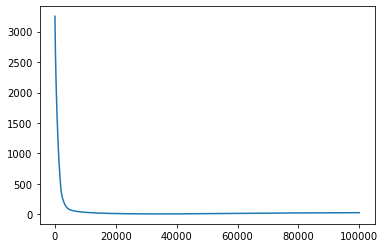

In [212]:
(LL,W1,b1,W2,b2,W3,b3,accuracy,k0,k1,k2)= run_multilayer_perceptron(X_train,Y_train,learning_rate=1e-5,iterations=100000,regularization=0.,verbose=True)

In [213]:

prediction_test = predict(X_test,W1,b1,W2,b2,W3,b3,k0,k1,k2)
er_test = np.abs(prediction_test-Y_test).mean()
print(f"test_classification_rate:{1-er_test}")


test_classification_rate:0.9407407407407408
